In [1]:
import experimenting
import event_library as el
import torch

In [2]:
hw = el.utils.get_hw_property('dvs')

In [3]:
import importlib

In [4]:
importlib.reload(experimenting)

<module 'experimenting' from '/home/gianscarpe/dev/event-based-monocular-hpe/experimenting/__init__.py'>

In [5]:
core = experimenting.dataset.HumanCore('test', 'scripts/h3m/h3m/', 'scripts/h3m/h3m/3d_joints.npz', 'cross-subject', 1)

In [6]:
frame = core.get_frame_from_id(30)


In [7]:
from matplotlib import pyplot as plt

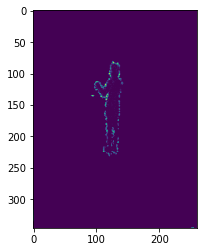

In [8]:
plt.imshow(core.get_frame_from_id(100))

In [9]:
sk, intr, extr = core.get_joint_from_id(1)

In [10]:
from experimenting.utils.visualization import plot_skeleton_2d, plot_skeleton_3d

In [11]:
sk, intr, extr = core.get_joint_from_id(1)


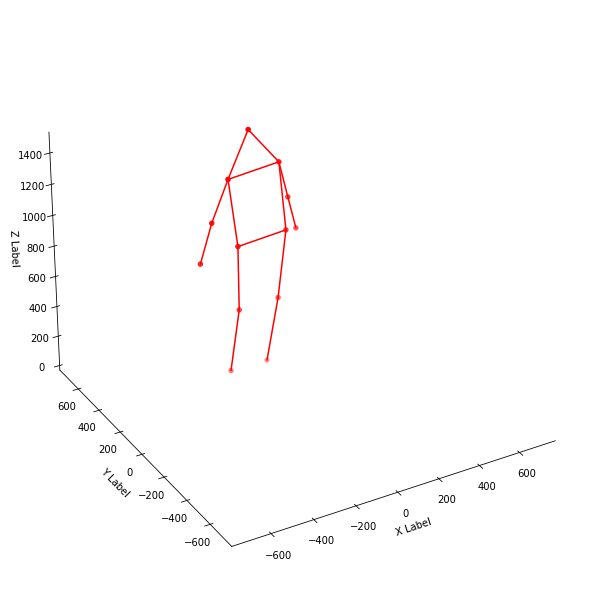

In [12]:
plot_skeleton_3d(sk)

In [13]:
joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)

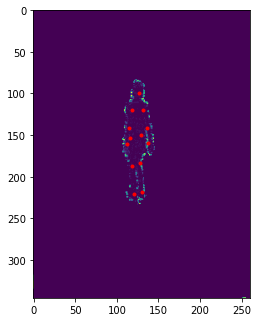

In [14]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(frame.squeeze())
ax.plot(joints[:, 0], joints[:, 1], '.', c='red')

In [15]:
core.frames_info[1]

{'subject': 1, 'action': 'Directions', 'cam': 0, 'frame': '0000001'}

In [16]:
extr

tensor([[-9.1536e-01,  4.0181e-01,  2.5748e-02, -3.4605e+02],
        [ 5.1548e-02,  1.8037e-01, -9.8225e-01,  5.4698e+02],
        [-3.9932e-01, -8.9778e-01, -1.8582e-01,  5.4745e+03]])

In [17]:
intr

tensor([[297.7129,   0.0000, 133.2608,   0.0000],
        [  0.0000, 394.9583, 177.9902,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000]])

In [18]:
from experimenting.dataset.core import h3m
from experimenting.dataset.core import HumanCore
import kornia
import numpy as np

In [19]:
ratio_w

NameError: name 'ratio_w' is not defined

In [ ]:
w = 246
h = 360

In [ ]:
data = np.load("/data/gscarpellini/dataset/human3.6m/dataset/data_3d_h36m.npz", allow_pickle=True)
intr = h3m.h36m_cameras_intrinsic_params[0]
extr = h3m.h36m_cameras_extrinsic_params['S1'][0]

quaternion = torch.tensor(extr['orientation'])[[1, 2, 3, 0]]
quaternion[:3] *= -1

rot = kornia.quaternion_to_rotation_matrix(quaternion)
t = torch.tensor(extr['translation'])
#tr = torch.matmul(rot, t)

In [ ]:


ratio_w = w / intr['res_w']
ratio_h = h / intr['res_h']
#ratio_w = ratio_h = 1
intr_matrix = torch.tensor([[ratio_h * intr['focal_length'][0], 0, ratio_h * intr['center'][0], 0], [0, ratio_w * intr['focal_length'][1], ratio_w * intr['center'][1], 0], [0, 0, 1, 0]])[:, :3]

In [ ]:
xyz = torch.tensor(data['positions_3d'].item()['S1']['Posing 1'][0])[HumanCore.JOINTS]

In [ ]:
p = torch.matmul(intr_matrix, extr_matrix)

In [ ]:
xyz[0]

In [ ]:
xyz_hom = torch.cat([xyz.transpose(1, 0), torch.ones([1, len(xyz)])], axis=0)

In [ ]:
extr_matrix = torch.cat([torch.cat([rot, - (torch.matmul(rot, t)).unsqueeze(1)], 1)])
xyz_cam = torch.matmul(extr_matrix, xyz_hom)
expected = torch.tensor([ 0.1562438 , -0.94835234,  5.0147195 ],)
print(f"Shoul be equal {xyz_cam[:, 0]} and {expected}")
assert torch.equal(xyz_cam[:, 0], expected)

In [ ]:
coords = torch.matmul(intr_matrix, xyz_cam)

In [ ]:
coords[:, 0]

In [ ]:
coords = coords / coords[-1]

In [ ]:
coords[:, 0][1]

In [ ]:
u = coords[0].type(torch.int).unsqueeze(1)
v = coords[1].type(torch.int).unsqueeze(1)

image = torch.cat((u, v), 1)


In [ ]:
image

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(np.zeros((246, 360)))
ax.plot(u, v, '.', c='red')

In [ ]:
plot_skeleton_2d(frame.squeeze(), 

In [ ]:
v

In [ ]:
t

In [ ]:
torch.cat([rot, t.unsqueeze(1)], axis=1)